In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 50)

In [2]:
#df = pd.read_csv('final_dataset_with_add.csv')
path = '/Users/triciachia/Desktop/notes/Y4S2/BT4222/Project/Codes/Data/PrimaryDatasets/'
df = pd.read_csv(path+'final_dataset.csv')
df.head()

,Transacted Price ($),Sale Date,Area (SQM),Unit Price ($ PSM),Property Type,Postal Code,Planning Region,Planning Area,Floor Number,BLK_NO,ROAD_NAME,BUILDING,POSTAL,PPI,Police Centre,Average Cases Per Year,Number of Primary Schools,Nearest Primary School,num_stations_1km,nearest_station_distance,Remaining Lease,Age Sold,Ang Mo Kio,Bedok,Bishan,Bukit Batok,Bukit Merah,Bukit Panjang,Bukit Timah,Choa Chu Kang,...,Kallang,Mandai,Marine Parade,Museum,Newton,Novena,Orchard,Outram,Pasir Ris,Punggol,Queenstown,River Valley,Rochor,Sembawang,Sengkang,Serangoon,Singapore River,Southern Islands,Tampines,Tanglin,Toa Payoh,Woodlands,Yishun,BLUE,BROWN,GREEN,LRT,PURPLE,RED,YELLOW
0,"600,000",2010-01-01,95.0,6316.0,Condominium,759151,North Region,Mandai,1.0,5,JALAN MATA AYER,EUPHONY GARDENS,759151,124.3,Yishun South NPC,33,7,705.752731,0,1207.822015,87.0,9.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"1,909,000",2010-01-02,138.0,13833.0,Condominium,98656,Central Region,Bukit Merah,1.0,42,KEPPEL BAY DRIVE,CARIBBEAN AT KEPPEL BAY,98656,124.3,Bukit Merah West NPC,58,3,1233.947139,1,768.529003,88.0,6.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,"890,000",2010-01-03,99.0,8990.0,Condominium,597592,Central Region,Bukit Timah,10.0,7,PINE GROVE,ASTOR GREEN,597592,124.3,Clementi NPC,50,4,1039.586179,1,816.818037,80.0,15.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,"700,000",2010-01-03,111.0,6306.0,Condominium,768445,North Region,Yishun,6.0,81,YISHUN STREET 81,ORCHID PARK CONDOMINIUM,768445,124.3,Yishun South NPC,33,5,509.516515,1,501.364218,80.0,16.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,"1,700,000",2010-01-04,122.0,13934.0,Condominium,98641,Central Region,Bukit Merah,10.0,12,KEPPEL BAY DRIVE,CARIBBEAN AT KEPPEL BAY,98641,124.3,Bukit Merah West NPC,58,3,1253.733260,1,554.491114,88.0,6.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [3]:
df.shape

(54754, 66)

In [4]:
#data = df.drop_duplicates()
data = df.copy()

In [5]:
data.shape

(54754, 66)

## Hypothesis 1: Properties with shorter remaining lease has lower value


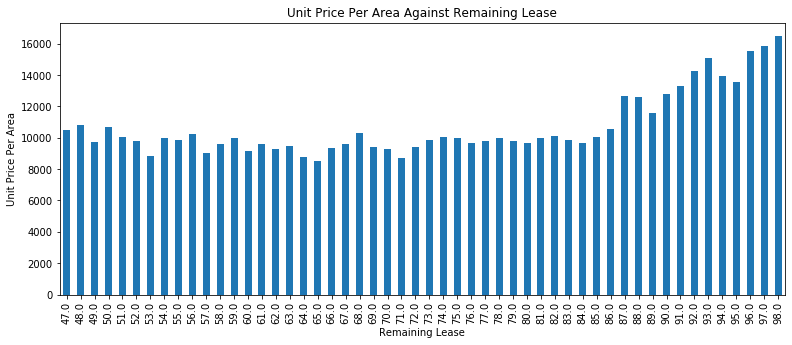

In [6]:
plt.figure()
df.groupby('Remaining Lease').mean()['Unit Price ($ PSM)'].plot(kind='bar', figsize= (13,5))
plt.xlabel('Remaining Lease')
plt.ylabel('Unit Price Per Area')
plt.title('Unit Price Per Area Against Remaining Lease')
plt.show()   

In [7]:
## Get month and year from sales date
data['Sale Date'] = pd.to_datetime(data['Sale Date'])
data['Sale Year'] = data['Sale Date'].apply(lambda x: x.year)
#data['Sale Month'] = data['Sale Date'].apply(lambda x: x.month)
data['Sale Month Year'] = data['Sale Date'].dt.strftime('%Y-%m')
data.head(60)

,Transacted Price ($),Sale Date,Area (SQM),Unit Price ($ PSM),Property Type,Postal Code,Planning Region,Planning Area,Floor Number,BLK_NO,ROAD_NAME,BUILDING,POSTAL,PPI,Police Centre,Average Cases Per Year,Number of Primary Schools,Nearest Primary School,num_stations_1km,nearest_station_distance,Remaining Lease,Age Sold,Ang Mo Kio,Bedok,Bishan,Bukit Batok,Bukit Merah,Bukit Panjang,Bukit Timah,Choa Chu Kang,...,Marine Parade,Museum,Newton,Novena,Orchard,Outram,Pasir Ris,Punggol,Queenstown,River Valley,Rochor,Sembawang,Sengkang,Serangoon,Singapore River,Southern Islands,Tampines,Tanglin,Toa Payoh,Woodlands,Yishun,BLUE,BROWN,GREEN,LRT,PURPLE,RED,YELLOW,Sale Year,Sale Month Year
0,"600,000",2010-01-01,95.0,6316.0,Condominium,759151,North Region,Mandai,1.0,5,JALAN MATA AYER,EUPHONY GARDENS,759151,124.3,Yishun South NPC,33,7,705.752731,0,1207.822015,87.0,9.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,2010-01
1,"1,909,000",2010-01-02,138.0,13833.0,Condominium,98656,Central Region,Bukit Merah,1.0,42,KEPPEL BAY DRIVE,CARIBBEAN AT KEPPEL BAY,98656,124.3,Bukit Merah West NPC,58,3,1233.947139,1,768.529003,88.0,6.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2010,2010-01
2,"890,000",2010-01-03,99.0,8990.0,Condominium,597592,Central Region,Bukit Timah,10.0,7,PINE GROVE,ASTOR GREEN,597592,124.3,Clementi NPC,50,4,1039.586179,1,816.818037,80.0,15.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2010,2010-01
3,"700,000",2010-01-03,111.0,6306.0,Condominium,768445,North Region,Yishun,6.0,81,YISHUN STREET 81,ORCHID PARK CONDOMINIUM,768445,124.3,Yishun South NPC,33,5,509.516515,1,501.364218,80.0,16.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,2010,2010-01
4,"1,700,000",2010-01-04,122.0,13934.0,Condominium,98641,Central Region,Bukit Merah,10.0,12,KEPPEL BAY DRIVE,CARIBBEAN AT KEPPEL BAY,98641,124.3,Bukit Merah West NPC,58,3,1253.733260,1,554.491114,88.0,6.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2010,2010-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,"700,000",2010-01-05,108.0,6481.0,Apartment,398028,Central Region,Geylang,3.0,7,LORONG 42 GEYLANG,ASTON MANSIONS,398028,124.3,Geylang NPC,133,4,906.702696,3,426.010040,84.0,12.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,2010,2010-01
56,"1,050,000",2010-01-05,135.0,7778.0,Condominium,129202,West Region,Clementi,1.0,50H,FABER HEIGHTS,FABER CREST,129202,124.3,Clementi NPC,50,5,491.484729,0,1187.410389,85.0,9.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,2010-01
57,"980,000",2010-01-05,113.0,8673.0,Condominium,545019,North East Region,Hougang,13.0,35,KOVAN ROAD,KOVAN MELODY,545019,124.3,Serangoon NPC,39,8,821.465750,1,257.906323,93.0,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2010,2010-01
58,"1,000,000",2010-01-05,108.0,9259.0,Condominium,138679,Central Region,Queenstown,18.0,8,DOVER RISE,HERITAGE VIEW,138679,124.3,Clementi NPC,50,2,472.647224,2,810.843697,85.0,10.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2010,2010-01


## Distribution of Unit Prices per PSM

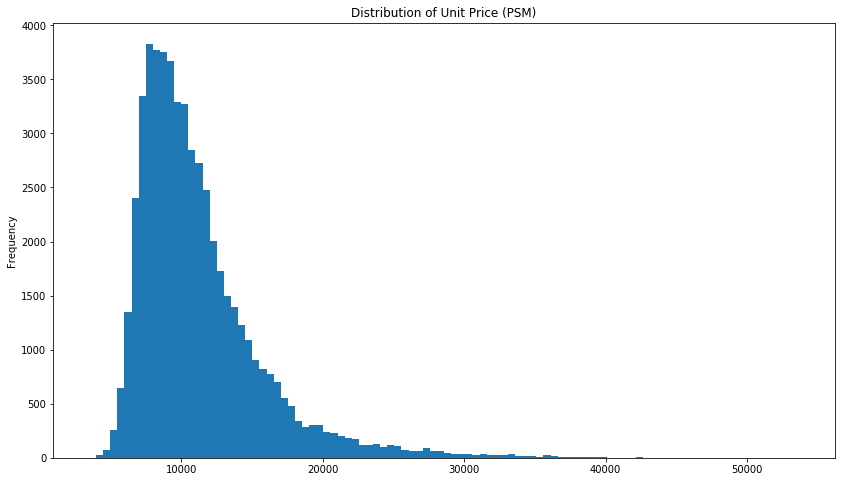

In [8]:
# looking at distribution of prices
data['Unit Price ($ PSM)'].plot.hist(bins = 100, figsize =(14,8), title = 'Distribution of Unit Price (PSM)')

### By planning region

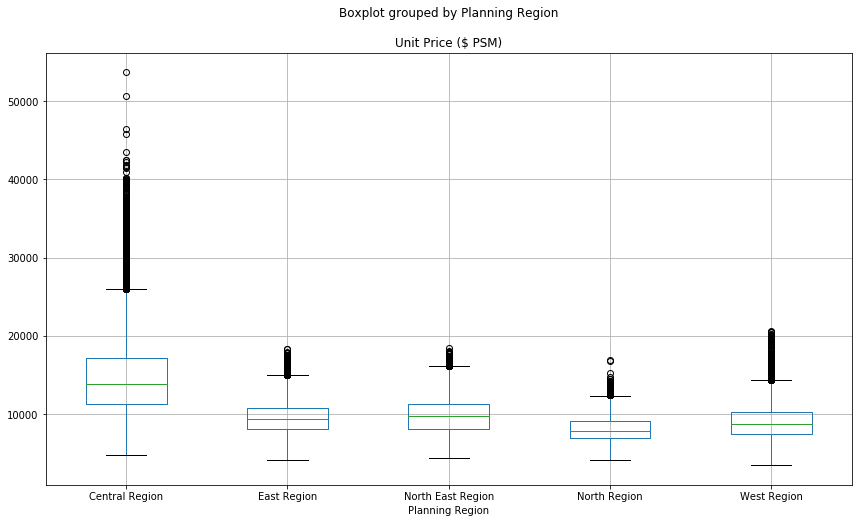

In [9]:
# unit price by planning region
data.boxplot('Unit Price ($ PSM)',by="Planning Region", figsize = (14,8))

Central has the highest mean which is expected. However, it has a alot of outliers too with large interquartile range. Within central region, there are many different types of housing/estates with some being extremely expensive and hence, larger number of outliers

### By planning area

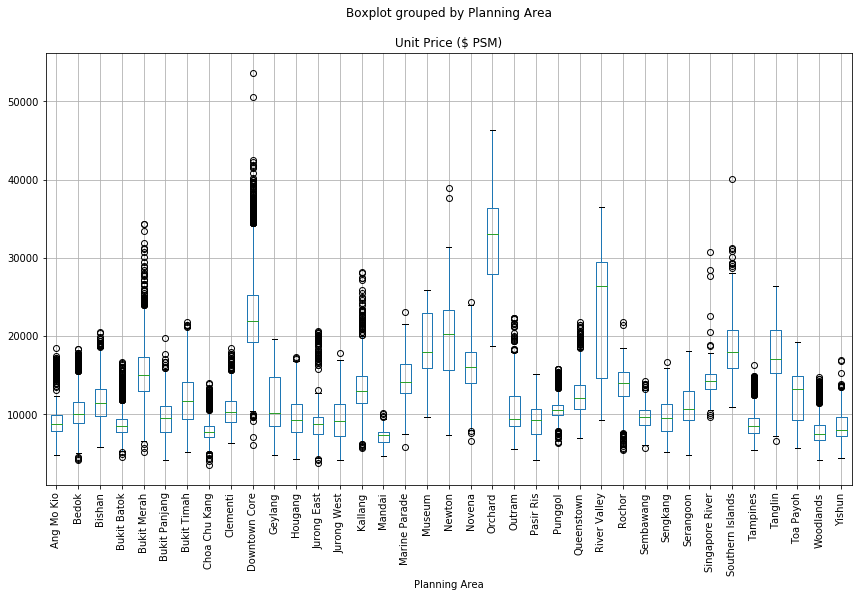

In [10]:
## by planning area
data.boxplot('Unit Price ($ PSM)',by="Planning Area", rot =90, figsize = (14,8))

1. Orchard and River Valley has the high mean but there is no outlier. 
2. Downtown Core, Bukit Merah, Kallang have many outliers. 
3. North side has relatively lower mean. (Mandai, yishun, woodlands)
4. Rochor has alot of lower bound outliers
5. Tampines, Woodlands, Ang Mo Kio a lot of upper bound outliers. 


In [11]:
# downtown
downtown_higher_df = data[(data['Planning Area'] == 'Downtown Core') & (data['Unit Price ($ PSM)'] > 35000)]
print('Higher Bound Outliers Number of cases: ' + str(downtown_higher_df['Average Cases Per Year'].mean()))
print('Higher Bound Outliers Remaining Lease: ' + str(downtown_higher_df['Remaining Lease'].mean()))
print('Higher Bound Outliers Number of primary schools: ' + str(downtown_higher_df['Number of Primary Schools'].mean()))
print('Higher Bound Outliers Nearest distance to primary schools: ' + str(downtown_higher_df['Nearest Primary School'].mean()))
print('Higher Bound Outliers Number of stations within 1km: ' + str(downtown_higher_df['num_stations_1km'].mean()))
print('Higher Bound Outliers distance to nearest station: ' + str(downtown_higher_df['nearest_station_distance'].mean()))

Higher Bound Outliers Number of cases: 95.27659574468085
Higher Bound Outliers Remaining Lease: 88.07446808510639
Higher Bound Outliers Number of primary schools: 1.1808510638297873
Higher Bound Outliers Nearest distance to primary schools: 1036.9438768923587
Higher Bound Outliers Number of stations within 1km: 5.882978723404255
Higher Bound Outliers distance to nearest station: 128.39684990487973


In [12]:
downtown_lower_df = data[(data['Planning Area'] == 'Downtown Core') & (data['Unit Price ($ PSM)'] < 10000)]
print('Lower Bound Outliers Number of cases: ' + str(downtown_lower_df['Average Cases Per Year'].mean()))
print('Lower Bound Outliers Remaining Lease: ' + str(downtown_lower_df['Remaining Lease'].mean()))
print('Lower Bound Outliers Number of primary schools: ' + str(downtown_lower_df['Number of Primary Schools'].mean()))
print('Lower Bound Outliers Nearest distance to primary schools: ' + str(downtown_lower_df['Nearest Primary School'].mean()))
print('Lower Bound Outliers Number of stations within 1km: ' + str(downtown_lower_df['num_stations_1km'].mean()))
print('Lower Bound Outliers distance to nearest station: ' + str(downtown_lower_df['nearest_station_distance'].mean()))

Lower Bound Outliers Number of cases: 87.8
Lower Bound Outliers Remaining Lease: 56.1
Lower Bound Outliers Number of primary schools: 2.0
Lower Bound Outliers Nearest distance to primary schools: 716.5425613953042
Lower Bound Outliers Number of stations within 1km: 3.8
Lower Bound Outliers distance to nearest station: 123.53820575519667


In downtown core, there is a large difference in the remaining lease of the properties in the upper bound vs the properties in the lower bound. Hence, it verifies hypothesis 1.

In [13]:
# Kallang
kallang_higher_df = data[(data['Planning Area'] == 'Kallang') & (data['Unit Price ($ PSM)'] > 20000)]
print('Higher Bound Outliers Number of cases: ' + str(kallang_higher_df['Average Cases Per Year'].mean()))
print('Higher Bound Outliers Remaining Lease: ' + str(kallang_higher_df['Remaining Lease'].mean()))
print('Higher Bound Outliers Number of primary schools: ' + str(kallang_higher_df['Number of Primary Schools'].mean()))
print('Higher Bound Outliers Nearest distance in primary school: ' + str(kallang_higher_df['Nearest Primary School'].mean()))
print('Higher Bound Outliers Number of stations within 1km: ' + str(kallang_higher_df['num_stations_1km'].mean()))
print('Higher Bound Outliers distance to nearest station: ' + str(kallang_higher_df['nearest_station_distance'].mean()))

Higher Bound Outliers Number of cases: 99.0
Higher Bound Outliers Remaining Lease: 89.125
Higher Bound Outliers Number of primary schools: 2.0833333333333335
Higher Bound Outliers Nearest distance in primary school: 664.6503206209935
Higher Bound Outliers Number of stations within 1km: 4.854166666666667
Higher Bound Outliers distance to nearest station: 220.34791836867694


In [14]:
kallang_lower_df = data[(data['Planning Area'] == 'Kallang') & (data['Unit Price ($ PSM)'] < 8000)]
print('Lower Bound Outliers Number of cases: ' + str(kallang_lower_df['Average Cases Per Year'].mean()))
print('Lower Bound Outliers Remaining Lease: ' + str(kallang_lower_df['Remaining Lease'].mean()))
print('Lower Bound Outliers Number of primary schools: ' + str(kallang_lower_df['Number of Primary Schools'].mean()))
print('Lower Bound Outliers Nearest distance in primary schools: ' + str(kallang_lower_df['Nearest Primary School'].mean()))
print('Lower Bound Outliers Number of stations within 1km: ' + str(kallang_lower_df['num_stations_1km'].mean()))
print('Lower Bound Outliers distance to nearest station: ' + str(kallang_lower_df['nearest_station_distance'].mean()))

Lower Bound Outliers Number of cases: 57.892857142857146
Lower Bound Outliers Remaining Lease: 75.92857142857143
Lower Bound Outliers Number of primary schools: 5.803571428571429
Lower Bound Outliers Nearest distance in primary schools: 401.96411910810303
Lower Bound Outliers Number of stations within 1km: 1.9464285714285714
Lower Bound Outliers distance to nearest station: 505.80706799648294


In Kallang, there is also substantial difference in the remaining lease of the properties in the upper bound vs the properties in the lower bound. Also, properties in the lower bound (i.e have lower unit prices) are further away from train stations. 

## Correlation Unit price per PSM and other variables

In [15]:
col = ['Transacted Price ($)', 'Sale Date', 'Area (SQM)', 'Unit Price ($ PSM)', 'Planning Region', 'Planning Area', 'Floor Number',
       'BLK_NO', 'ROAD_NAME', 'BUILDING', 'PPI', 'Police Centre',
       'Average Cases Per Year','Nearest Primary School',
       'Number of Primary Schools', 'num_stations_1km',
       'nearest_station_distance', 'Remaining Lease']

data[col].corr()

,Area (SQM),Unit Price ($ PSM),Floor Number,PPI,Average Cases Per Year,Nearest Primary School,Number of Primary Schools,num_stations_1km,nearest_station_distance,Remaining Lease
Area (SQM),1.000000,-0.128370,0.004309,-0.058694,-0.001655,0.164294,-0.112629,-0.109053,0.138422,-0.196940
Unit Price ($ PSM),-0.128370,1.000000,0.423061,0.190295,0.351768,0.297501,-0.355636,0.212667,-0.174496,0.311910
Floor Number,0.004309,0.423061,1.000000,0.003264,0.166609,0.020877,-0.151159,0.202156,-0.179491,0.036656
PPI,-0.058694,0.190295,0.003264,1.000000,-0.026446,-0.033145,0.116205,0.101022,-0.073000,-0.017407
Average Cases Per Year,-0.001655,0.351768,0.166609,-0.026446,1.000000,0.239879,-0.172534,0.305689,-0.204198,0.036058
Nearest Primary School,0.164294,0.297501,0.020877,-0.033145,0.239879,1.000000,-0.522988,-0.120951,0.382531,-0.038846
Number of Primary Schools,-0.112629,-0.355636,-0.151159,0.116205,-0.172534,-0.522988,1.000000,0.295833,-0.311085,0.153546
num_stations_1km,-0.109053,0.212667,0.202156,0.101022,0.305689,-0.120951,0.295833,1.000000,-0.572198,0.075482
nearest_station_distance,0.138422,-0.174496,-0.179491,-0.073000,-0.204198,0.382531,-0.311085,-0.572198,1.000000,-0.140343
Remaining Lease,-0.196940,0.311910,0.036656,-0.017407,0.036058,-0.038846,0.153546,0.075482,-0.140343,1.000000


- Correlations between other variables and Unit Price PSM are not very high. 
- Positive correlation between average number of cases and Unit price.
- Negative correlation between number of schools and unit price.
- Stronger correlation: remaining lease, floor number, and average number of cases

## Sales and Unit Price per PSM over time

### Number of Units Sold over time

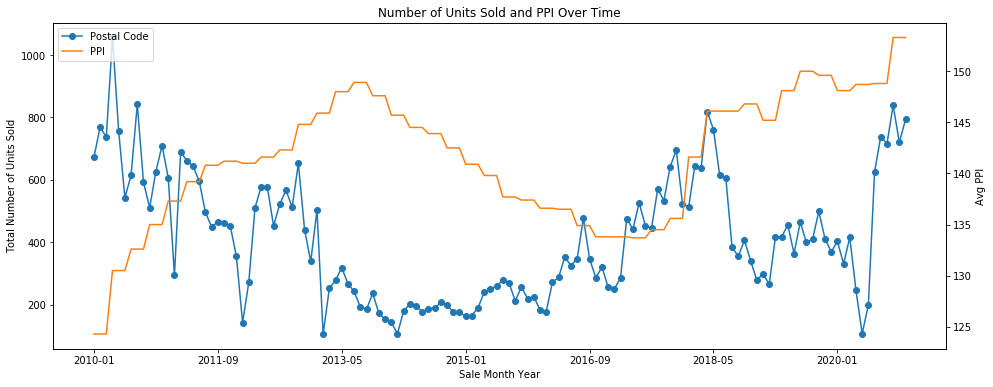

In [19]:
ax1 = data.groupby('Sale Month Year').count()['Postal Code'].plot(title = 'Number of Units Sold and PPI Over Time', marker='o',figsize = (16,6))
ax2 = data.groupby('Sale Month Year').max()['PPI'].plot(ax = ax1, secondary_y = True)
ax1.set_ylabel('Total Number of Units Sold')
ax2.set_ylabel('Avg PPI')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

Declining sales in the first few years (2010 to 2011-09) and increased till late 2012. Sales remained low from 2013 to 2016 before increasing again till 2018. From 2018-05 onwards, a lot of fluctuations. When PPI is higher, the number of sales decreases.

### Unit Price per PSM over time

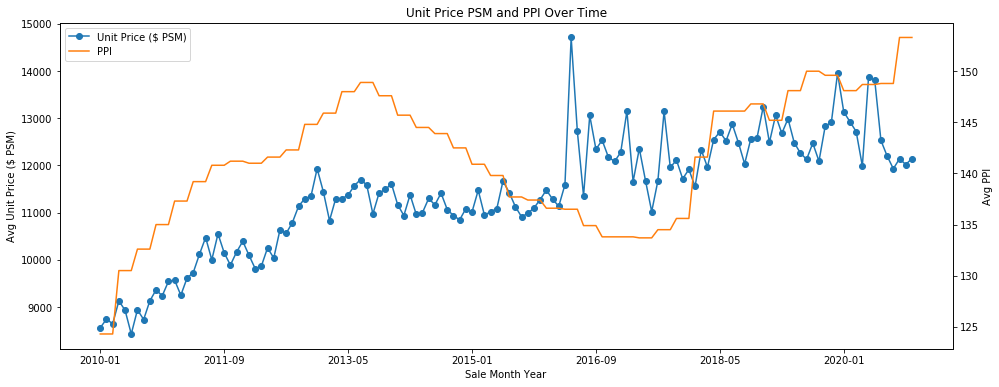

In [20]:
plt.figure(figsize = (16,6))
ax1 = data.groupby('Sale Month Year').mean()['Unit Price ($ PSM)'].plot(title = 'Unit Price PSM and PPI Over Time', marker='o',figsize = (16,6))
ax2 = data.groupby('Sale Month Year').max()['PPI'].plot(ax = ax1, secondary_y = True)
ax1.set_ylabel('Avg Unit Price ($ PSM)')
ax2.set_ylabel('Avg PPI')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

Unit Price per PSM has been increasing over the years and this could be due to the increasing cost of living. Houses now are more expensive than before

### Unit Price per PSM in Each Region Over Time
#### East Region

Text(0.5, 0, 'Year')

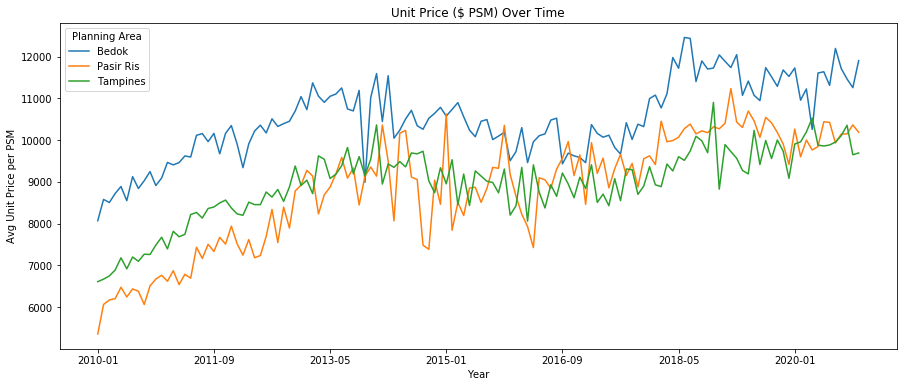

In [21]:
data[data['Planning Region'] == 'East Region'].groupby(['Sale Month Year', 'Planning Area']).mean()['Unit Price ($ PSM)'].unstack().plot(title = 'Unit Price ($ PSM) Over Time', figsize = (15,6))
plt.ylabel('Avg Unit Price per PSM')
plt.xlabel('Year')

Unit Prices per PSM in the east region are generally increasing. Bedok has higher Unit Prices per PSM as comapred to Pasir Ris and Tampines.
#### West Region

Text(0.5, 0, 'Year')

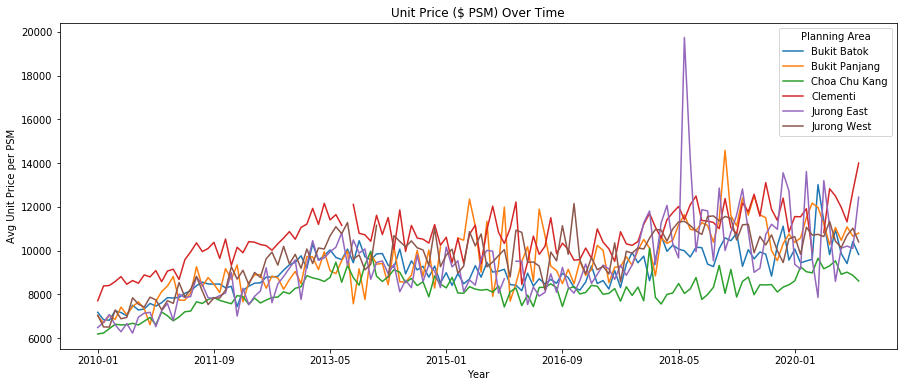

In [22]:
data[data['Planning Region'] == 'West Region'].groupby(['Sale Month Year', 'Planning Area']).mean()['Unit Price ($ PSM)'].unstack().plot(title = 'Unit Price ($ PSM) Over Time', figsize = (15,6))
plt.ylabel('Avg Unit Price per PSM')
plt.xlabel('Year')

Unit Prices per PSM in Jurong East fluctuated quite a bit, shown in the spike in prices in 2018 may. 
Unit Prices per PSM in Choa Chu Kang is the lowest among the planning areas in the west and it does not seem to be increasing in the recent years. 
As for the rest of the planning areas, they generally exhibited an increasing trend, with Clementi, Bukit Panjang and Bukit Batok having a more steady increase. 

#### North Region

Text(0.5, 0, 'Year')

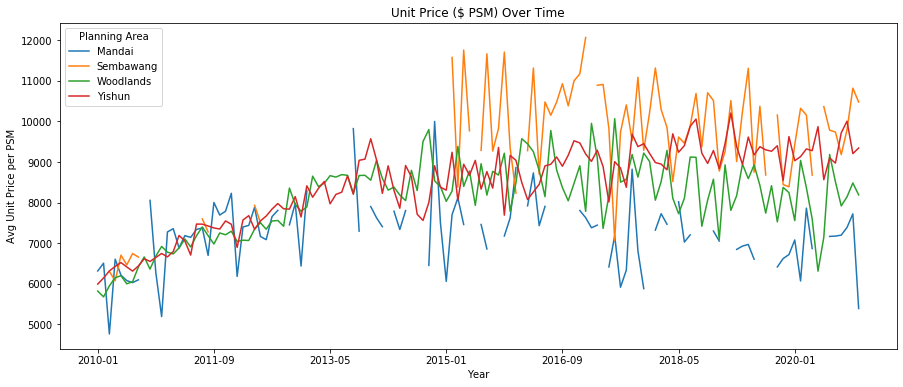

In [23]:
data[data['Planning Region'] == 'North Region'].groupby(['Sale Month Year', 'Planning Area']).mean()['Unit Price ($ PSM)'].unstack().plot(title = 'Unit Price ($ PSM) Over Time', figsize = (15,6))
plt.ylabel('Avg Unit Price per PSM')
plt.xlabel('Year')

There are not many transactions in Mandai over the years while Sembawang only has sales from 2015 onwards. However, Sembawang Unit Prices per PSM are relatively high as compared to the other planning areas in the north region. Unit Prices per PSM in Yishun increasing steadily while woodlands seems to be experiencing a decrease in the prices in recent years. 

#### North East Region

Text(0.5, 0, 'Year')

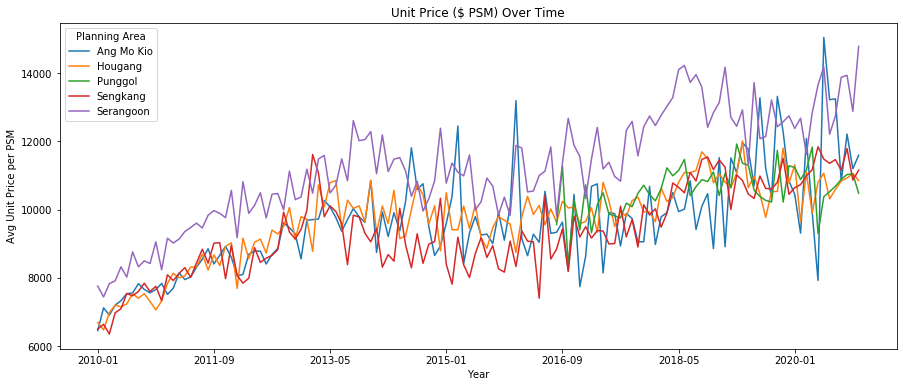

In [24]:
data[data['Planning Region'] == 'North East Region'].groupby(['Sale Month Year', 'Planning Area']).mean()['Unit Price ($ PSM)'].unstack().plot(title = 'Unit Price ($ PSM) Over Time', figsize = (15,6))
plt.ylabel('Avg Unit Price per PSM')
plt.xlabel('Year')

Unit Price per PSM in all planning areas in the North East Region are generally increasing and among them, Serangoon has the highest unit prices over the years. It seems to be enjoying large increase as well. As for Punggol, there are not much data on it since it is a relatively new estate and hence, transactions are only recorded from 2016 onwards. 

#### Central Region

Text(0.5, 0, 'Year')

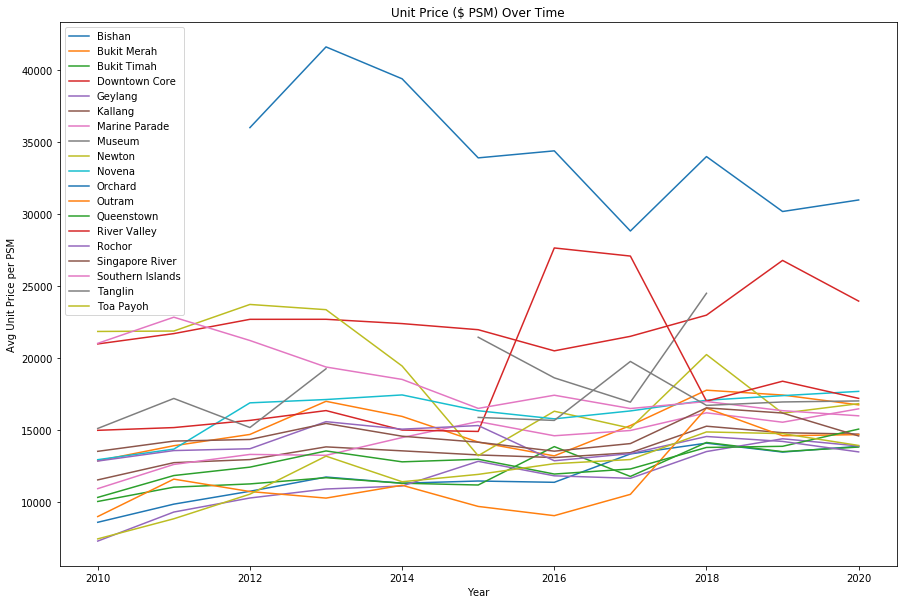

In [25]:
data[data['Planning Region'] == 'Central Region'].groupby(['Sale Year', 'Planning Area']).mean()['Unit Price ($ PSM)'].unstack().plot(title = 'Unit Price ($ PSM) Over Time', figsize = (15,10))
plt.legend(loc='upper left')
plt.ylabel('Avg Unit Price per PSM')
plt.xlabel('Year')


Unlike the other planning regions, the planning areas in the central region do not have much changes in their Unit Price per PSM over the years. The slight increase might be due to the fact that houses are generally more expensive now and might not be due to reasons such as the developments near the area. Also, Unit Price per PSM in Orchard has remained the highest even though it is decreasing from 2012 onwards.  

### Comparing the Number of Sales and Unit Price per PSM Over Time in Each Region
Note : Red line is the Unit Price per PSM, blue line is the number of property sold
#### West Region

Text(0, 0.5, 'Unit Price ($ PSM)')

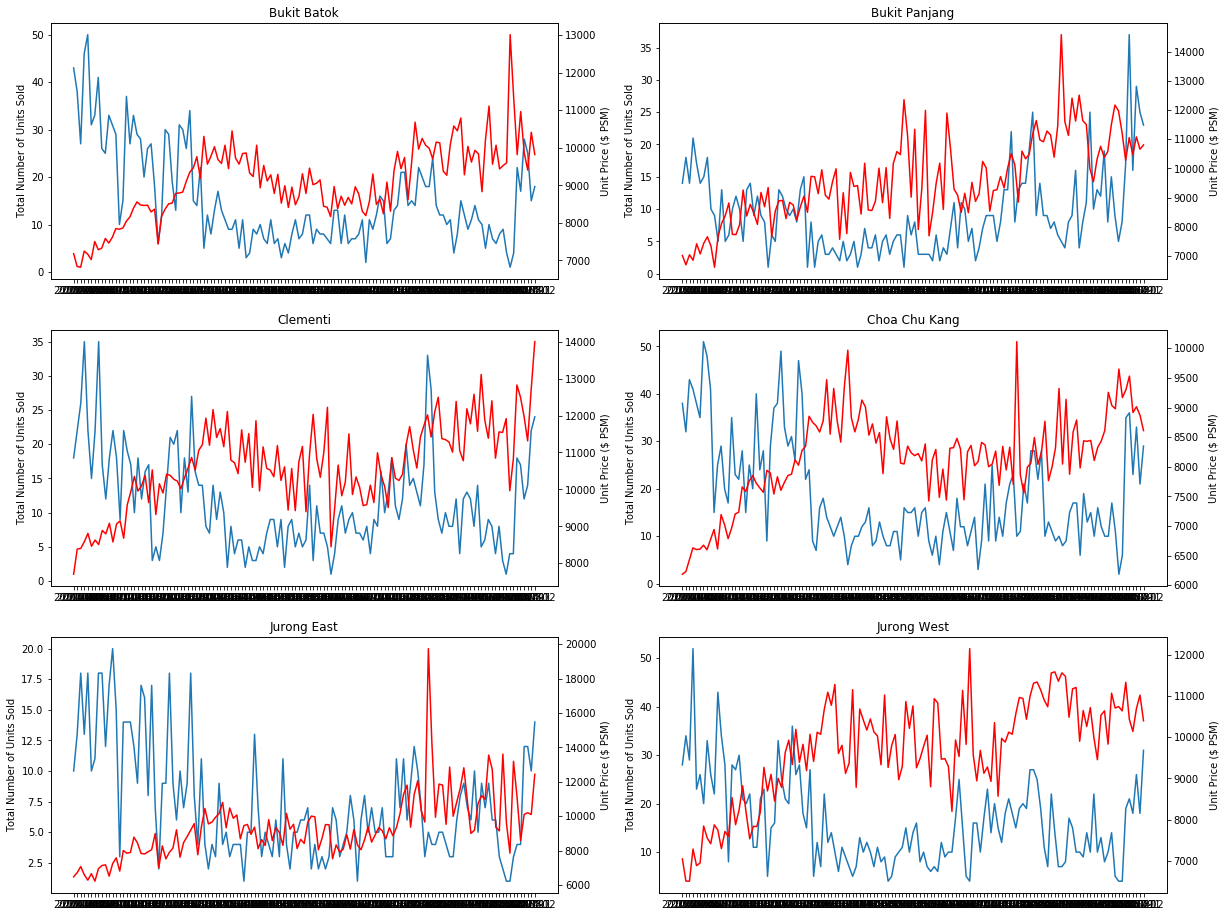

In [26]:
# West Region
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(20,16))

ax1=axes[0,0].twinx()
axes[0,0].plot(data[data['Planning Area'] == 'Bukit Batok'].groupby('Sale Month Year').count()['Postal Code'])
ax1.plot(data[data['Planning Area'] == 'Bukit Batok'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[0,0].set_title('Bukit Batok')
axes[0,0].set_ylabel('Total Number of Units Sold')
ax1.set_ylabel('Unit Price ($ PSM)')

ax2=axes[0,1].twinx()
axes[0,1].plot(data[data['Planning Area'] == 'Bukit Panjang'].groupby('Sale Month Year').count()['Postal Code'])
ax2.plot(data[data['Planning Area'] == 'Bukit Panjang'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[0,1].set_title('Bukit Panjang')
axes[0,1].set_ylabel('Total Number of Units Sold')
ax2.set_ylabel('Unit Price ($ PSM)')

ax3=axes[1,1].twinx()
axes[1,1].plot(data[data['Planning Area'] == 'Choa Chu Kang'].groupby('Sale Month Year').count()['Postal Code'])
ax3.plot(data[data['Planning Area'] == 'Choa Chu Kang'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[1,1].set_title('Choa Chu Kang')
axes[1,1].set_ylabel('Total Number of Units Sold')
ax3.set_ylabel('Unit Price ($ PSM)')

ax4=axes[1,0].twinx()
axes[1,0].plot(data[data['Planning Area'] == 'Clementi'].groupby('Sale Month Year').count()['Postal Code'])
ax4.plot(data[data['Planning Area'] == 'Clementi'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[1,0].set_title('Clementi')
axes[1,0].set_ylabel('Total Number of Units Sold')
ax4.set_ylabel('Unit Price ($ PSM)')

ax5=axes[2,0].twinx()
axes[2,0].plot(data[data['Planning Area'] == 'Jurong East'].groupby('Sale Month Year').count()['Postal Code'])
ax5.plot(data[data['Planning Area'] == 'Jurong East'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[2,0].set_title('Jurong East')
axes[2,0].set_ylabel('Total Number of Units Sold')
ax5.set_ylabel('Unit Price ($ PSM)')

ax6=axes[2,1].twinx()
axes[2,1].plot(data[data['Planning Area'] == 'Jurong West'].groupby('Sale Month Year').count()['Postal Code'])
ax6.plot(data[data['Planning Area'] == 'Jurong West'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[2,1].set_title('Jurong West')
axes[2,1].set_ylabel('Total Number of Units Sold')
ax6.set_ylabel('Unit Price ($ PSM)')

For Jurong West, Jurong East and Bukit Batok, as the number of property sold decreases over time, the unit price per PSM increase. On the other hand, Bukit Panjang is having an increasing trend for both the unit price per PSM and the number of property sold.
#### North Region


Text(0, 0.5, 'Unit Price ($ PSM)')

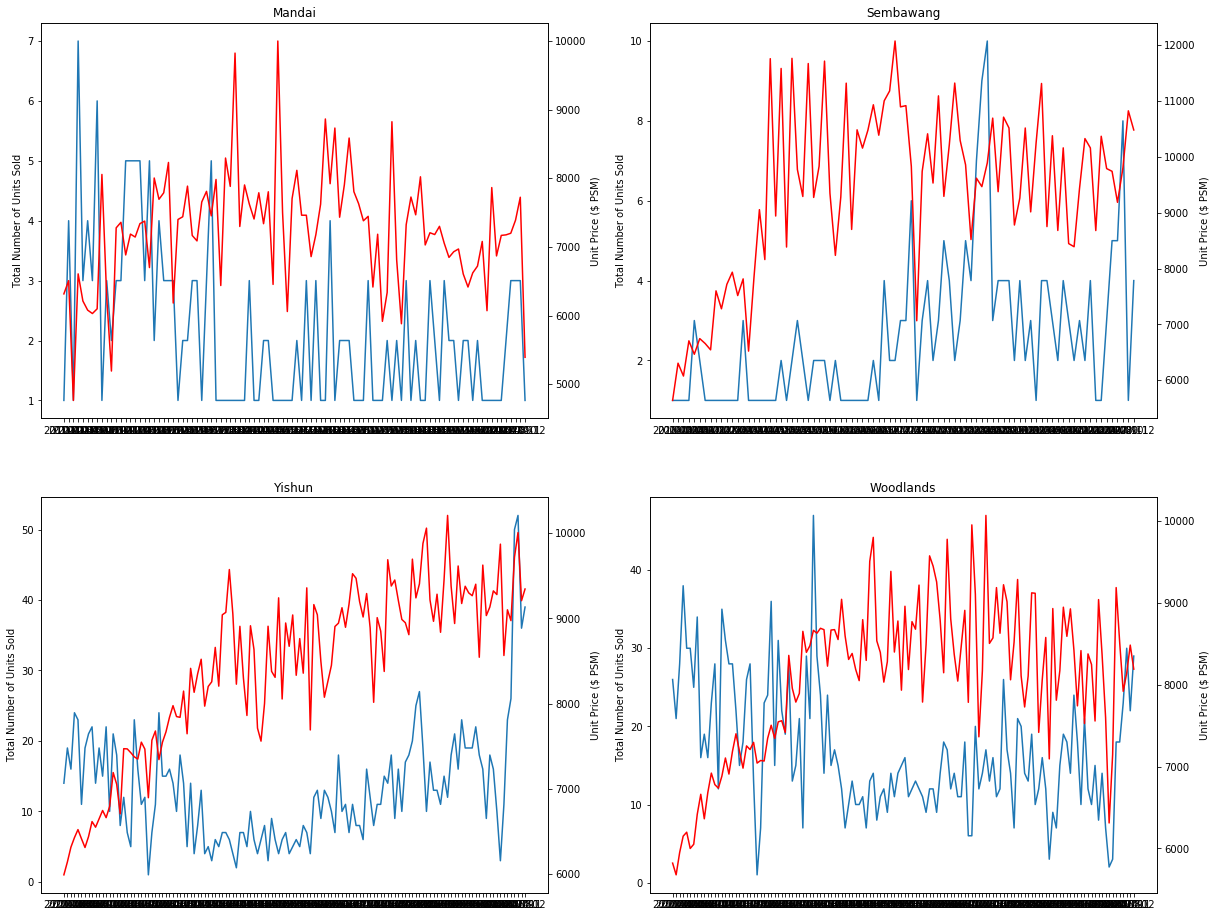

In [27]:
# North Region
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,16))
#axes[1].hist(df3['b'])
ax1=axes[0,0].twinx()
axes[0,0].plot(data[data['Planning Area'] == 'Mandai'].groupby('Sale Month Year').count()['Postal Code'])
ax1.plot(data[data['Planning Area'] == 'Mandai'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[0,0].set_title('Mandai')
axes[0,0].set_ylabel('Total Number of Units Sold')
ax1.set_ylabel('Unit Price ($ PSM)')

ax2=axes[0,1].twinx()
axes[0,1].plot(data[data['Planning Area'] == 'Sembawang'].groupby('Sale Month Year').count()['Postal Code'])
ax2.plot(data[data['Planning Area'] == 'Sembawang'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[0,1].set_title('Sembawang')
axes[0,1].set_ylabel('Total Number of Units Sold')
ax2.set_ylabel('Unit Price ($ PSM)')

ax3=axes[1,1].twinx()
axes[1,1].plot(data[data['Planning Area'] == 'Woodlands'].groupby('Sale Month Year').count()['Postal Code'])
ax3.plot(data[data['Planning Area'] == 'Woodlands'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[1,1].set_title('Woodlands')
axes[1,1].set_ylabel('Total Number of Units Sold')
ax3.set_ylabel('Unit Price ($ PSM)')

ax4=axes[1,0].twinx()
axes[1,0].plot(data[data['Planning Area'] == 'Yishun'].groupby('Sale Month Year').count()['Postal Code'])
ax4.plot(data[data['Planning Area'] == 'Yishun'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[1,0].set_title('Yishun')
axes[1,0].set_ylabel('Total Number of Units Sold')
ax4.set_ylabel('Unit Price ($ PSM)')

Number of sales in Mandai and Sembawang is low while Yishun seem to be having a decreasing trend in its number of property sold, just like Woodlands. However, Unit Prices per PSM in Yishun is increasing while that in Woodlands is decreasing

#### North East Region

Text(0, 0.5, 'Unit Price ($ PSM)')

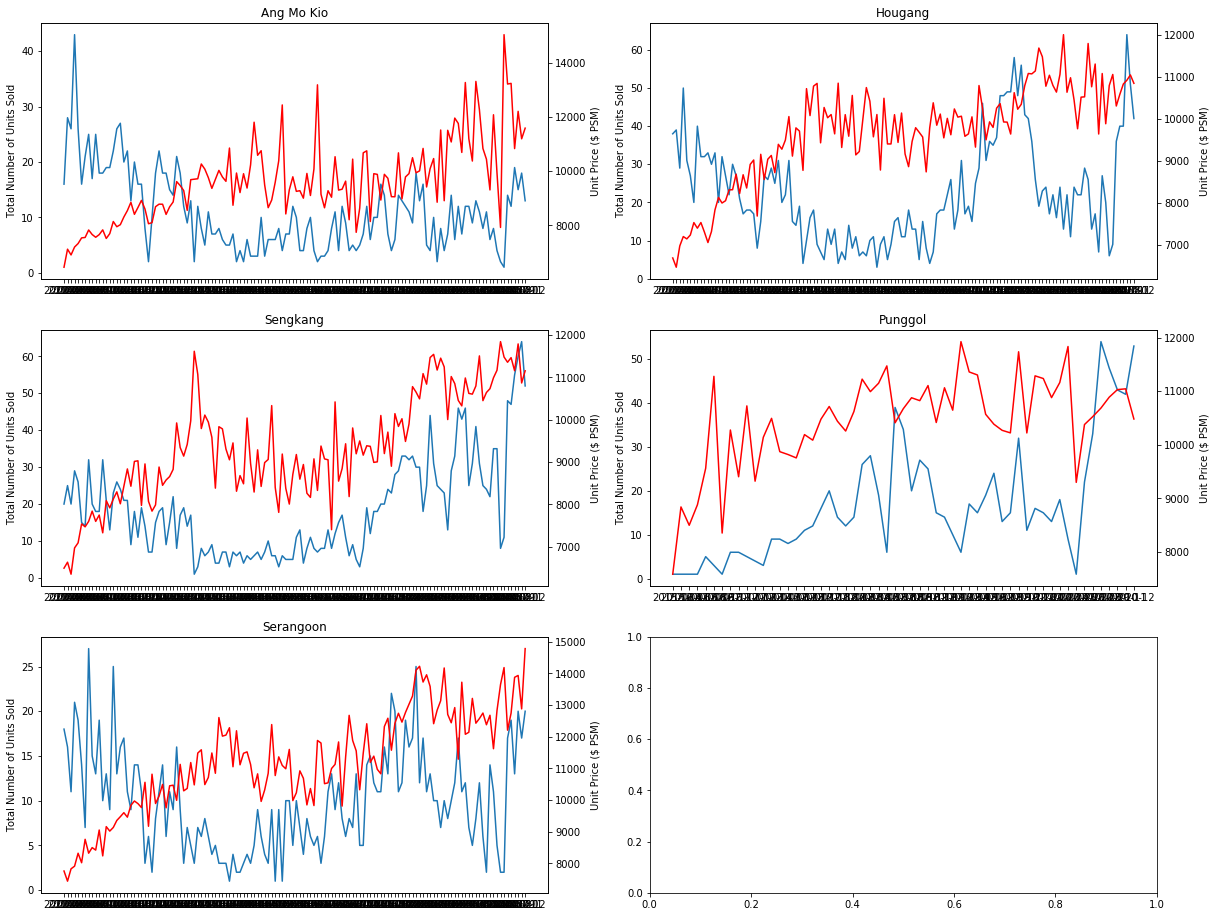

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(20,16))

ax1=axes[0,0].twinx()
axes[0,0].plot(data[data['Planning Area'] == 'Ang Mo Kio'].groupby('Sale Month Year').count()['Postal Code'])
ax1.plot(data[data['Planning Area'] == 'Ang Mo Kio'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[0,0].set_title('Ang Mo Kio')
axes[0,0].set_ylabel('Total Number of Units Sold')
ax1.set_ylabel('Unit Price ($ PSM)')

ax2=axes[0,1].twinx()
axes[0,1].plot(data[data['Planning Area'] == 'Hougang'].groupby('Sale Month Year').count()['Postal Code'])
ax2.plot(data[data['Planning Area'] == 'Hougang'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[0,1].set_title('Hougang')
axes[0,1].set_ylabel('Total Number of Units Sold')
ax2.set_ylabel('Unit Price ($ PSM)')

ax3=axes[1,1].twinx()
axes[1,1].plot(data[data['Planning Area'] == 'Punggol'].groupby('Sale Month Year').count()['Postal Code'])
ax3.plot(data[data['Planning Area'] == 'Punggol'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[1,1].set_title('Punggol')
axes[1,1].set_ylabel('Total Number of Units Sold')
ax3.set_ylabel('Unit Price ($ PSM)')

ax4=axes[1,0].twinx()
axes[1,0].plot(data[data['Planning Area'] == 'Sengkang'].groupby('Sale Month Year').count()['Postal Code'])
ax4.plot(data[data['Planning Area'] == 'Sengkang'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[1,0].set_title('Sengkang')
axes[1,0].set_ylabel('Total Number of Units Sold')
ax4.set_ylabel('Unit Price ($ PSM)')

ax5=axes[2,0].twinx()
axes[2,0].plot(data[data['Planning Area'] == 'Serangoon'].groupby('Sale Month Year').count()['Postal Code'])
ax5.plot(data[data['Planning Area'] == 'Serangoon'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[2,0].set_title('Serangoon')
axes[2,0].set_ylabel('Total Number of Units Sold')
ax5.set_ylabel('Unit Price ($ PSM)')

Sales in all areas except for Ang Mo Kio are increasing while the Unit Price per PSM is increasing for all the areas

#### Central

Text(0.5, 1.0, 'Novena')

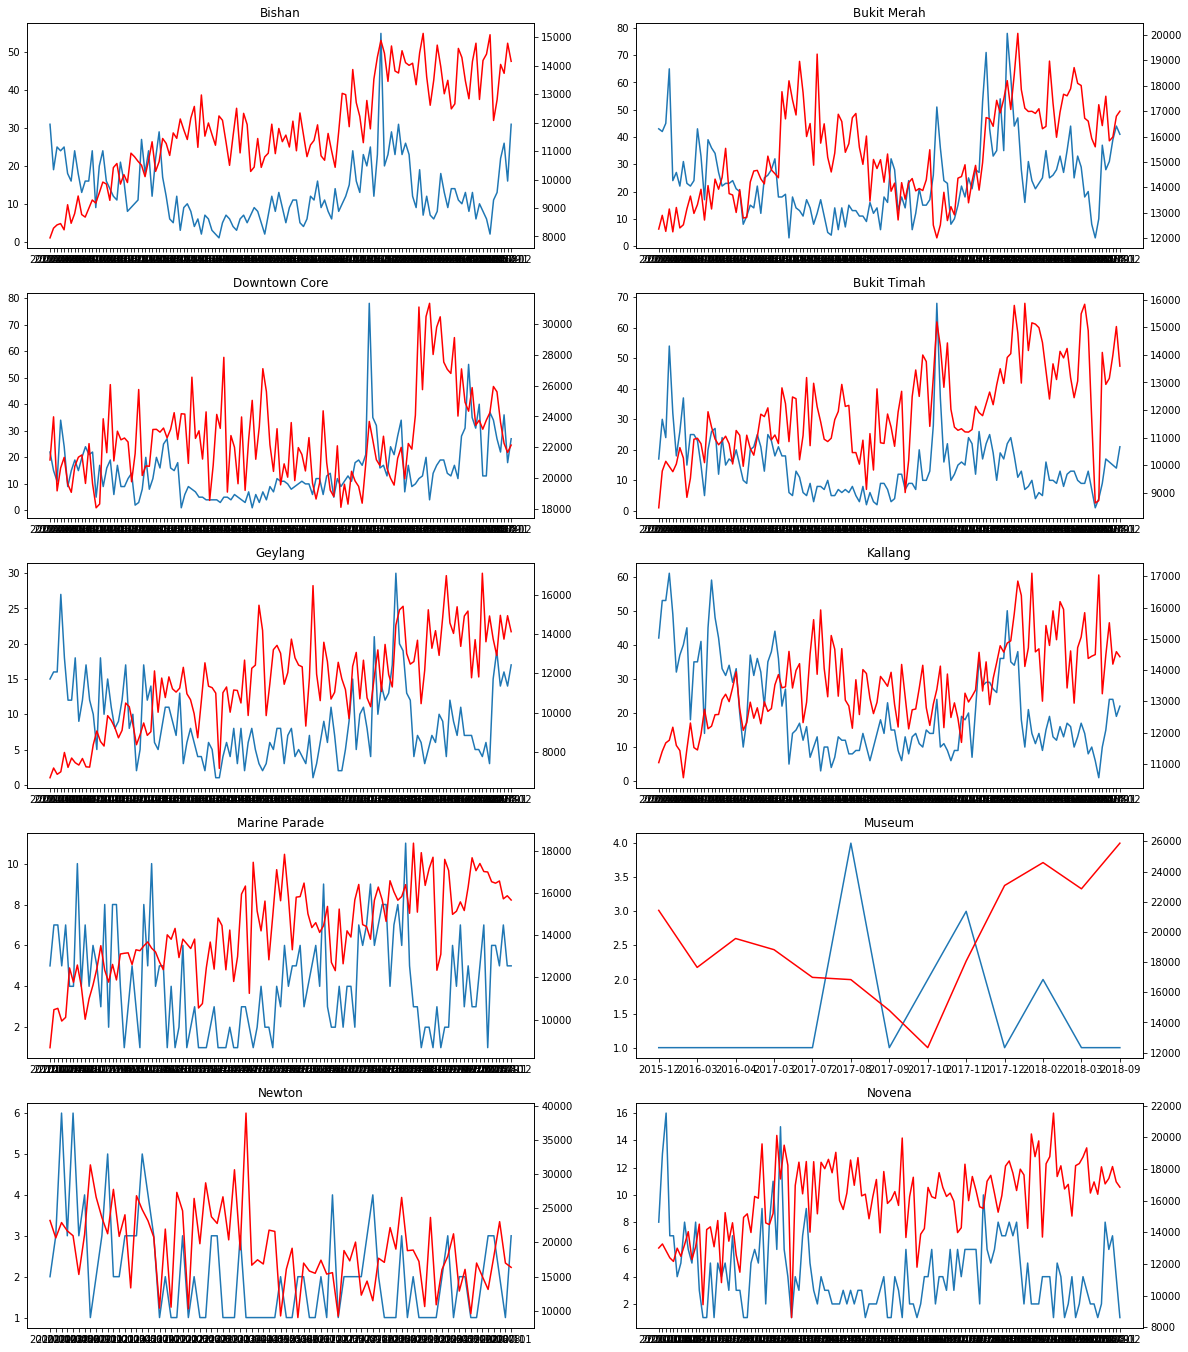

In [29]:
# Central 
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(20,24))
ax1=axes[0,0].twinx()
axes[0,0].plot(data[data['Planning Area'] == 'Bishan'].groupby('Sale Month Year').count()['Postal Code'])
ax1.plot(data[data['Planning Area'] == 'Bishan'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[0,0].set_title('Bishan')

ax2=axes[0,1].twinx()
axes[0,1].plot(data[data['Planning Area'] == 'Bukit Merah'].groupby('Sale Month Year').count()['Postal Code'])
ax2.plot(data[data['Planning Area'] == 'Bukit Merah'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[0,1].set_title('Bukit Merah')

ax3=axes[1,1].twinx()
axes[1,1].plot(data[data['Planning Area'] == 'Bukit Timah'].groupby('Sale Month Year').count()['Postal Code'])
ax3.plot(data[data['Planning Area'] == 'Bukit Timah'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[1,1].set_title('Bukit Timah')

ax4=axes[1,0].twinx()
axes[1,0].plot(data[data['Planning Area'] == 'Downtown Core'].groupby('Sale Month Year').count()['Postal Code'])
ax4.plot(data[data['Planning Area'] == 'Downtown Core'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[1,0].set_title('Downtown Core')

ax5=axes[2,0].twinx()
axes[2,0].plot(data[data['Planning Area'] == 'Geylang'].groupby('Sale Month Year').count()['Postal Code'])
ax5.plot(data[data['Planning Area'] == 'Geylang'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[2,0].set_title('Geylang')

ax6=axes[2,1].twinx()
axes[2,1].plot(data[data['Planning Area'] == 'Kallang'].groupby('Sale Month Year').count()['Postal Code'])
ax6.plot(data[data['Planning Area'] == 'Kallang'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[2,1].set_title('Kallang')

ax7=axes[3,0].twinx()
axes[3,0].plot(data[data['Planning Area'] == 'Marine Parade'].groupby('Sale Month Year').count()['Postal Code'])
ax7.plot(data[data['Planning Area'] == 'Marine Parade'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[3,0].set_title('Marine Parade')

ax8=axes[3,1].twinx()
axes[3,1].plot(data[data['Planning Area'] == 'Museum'].groupby('Sale Month Year').count()['Postal Code'])
ax8.plot(data[data['Planning Area'] == 'Museum'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[3,1].set_title('Museum')

ax9=axes[4,0].twinx()
axes[4,0].plot(data[data['Planning Area'] == 'Newton'].groupby('Sale Month Year').count()['Postal Code'])
ax9.plot(data[data['Planning Area'] == 'Newton'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[4,0].set_title('Newton')

ax10=axes[4,1].twinx()
axes[4,1].plot(data[data['Planning Area'] == 'Novena'].groupby('Sale Month Year').count()['Postal Code'])
ax10.plot(data[data['Planning Area'] == 'Novena'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[4,1].set_title('Novena')


Text(0.5, 1.0, 'Toa Payoh')

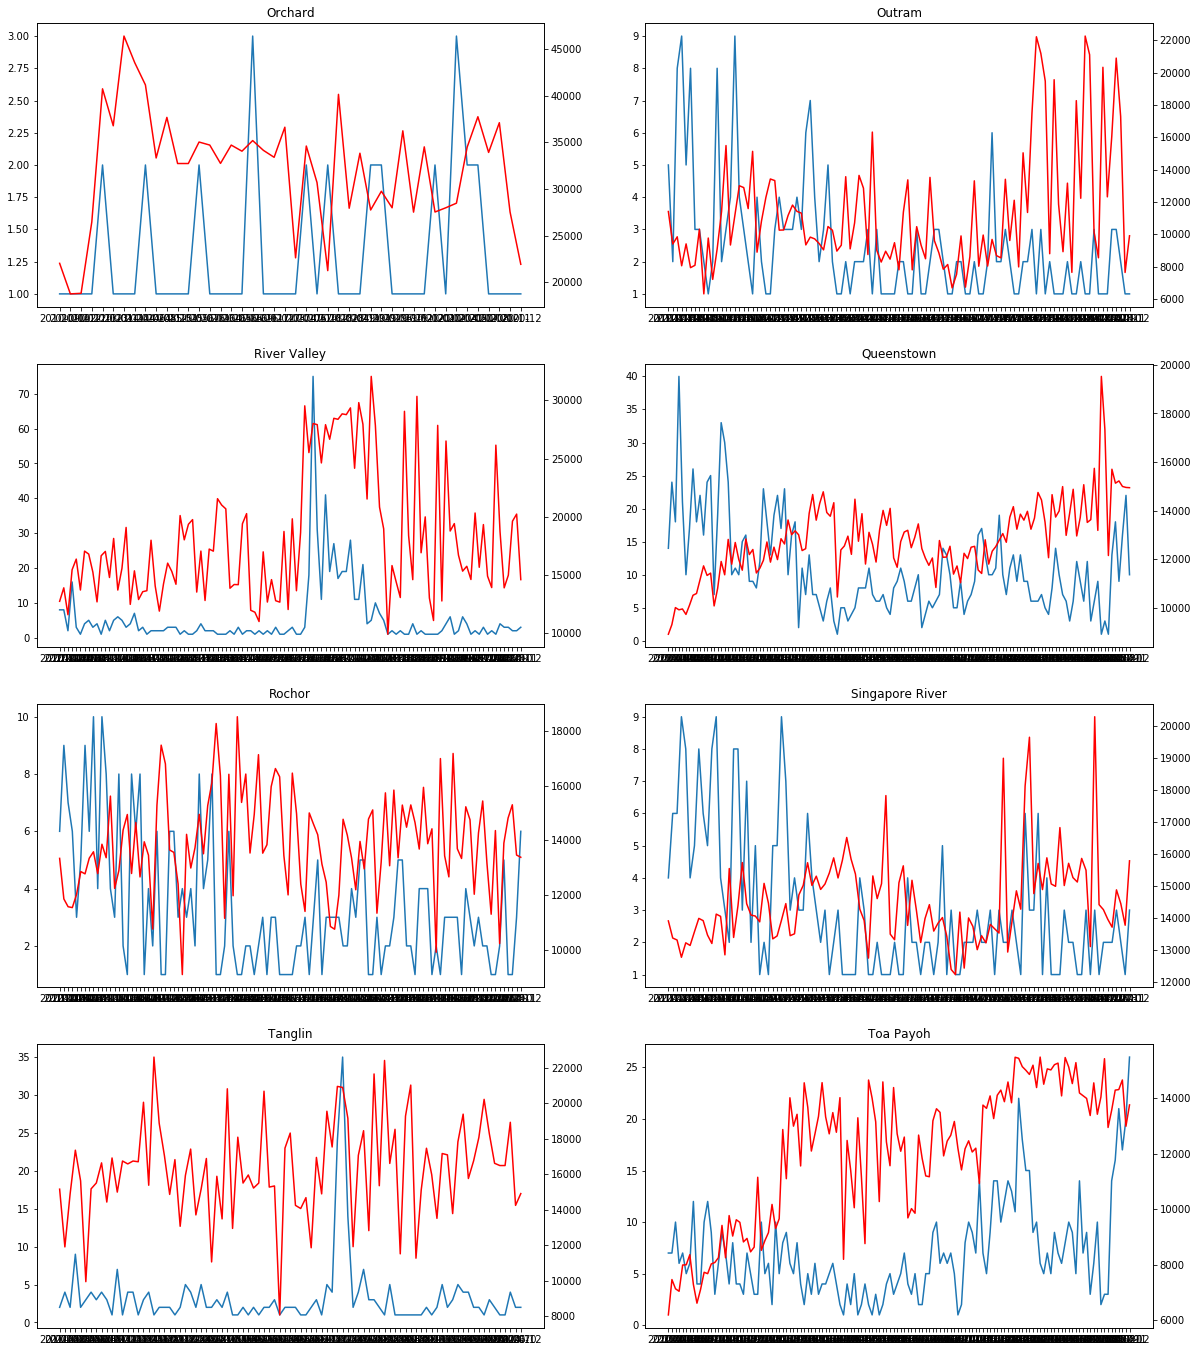

In [30]:
# Central 
fig, axes = plt.subplots(nrows=4, ncols=2,figsize=(20,24))
ax1=axes[0,0].twinx()
axes[0,0].plot(data[data['Planning Area'] == 'Orchard'].groupby('Sale Month Year').count()['Postal Code'])
ax1.plot(data[data['Planning Area'] == 'Orchard'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[0,0].set_title('Orchard')

ax2=axes[0,1].twinx()
axes[0,1].plot(data[data['Planning Area'] == 'Outram'].groupby('Sale Month Year').count()['Postal Code'])
ax2.plot(data[data['Planning Area'] == 'Outram'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[0,1].set_title('Outram')

ax3=axes[1,1].twinx()
axes[1,1].plot(data[data['Planning Area'] == 'Queenstown'].groupby('Sale Month Year').count()['Postal Code'])
ax3.plot(data[data['Planning Area'] == 'Queenstown'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[1,1].set_title('Queenstown')

ax4=axes[1,0].twinx()
axes[1,0].plot(data[data['Planning Area'] == 'River Valley'].groupby('Sale Month Year').count()['Postal Code'])
ax4.plot(data[data['Planning Area'] == 'River Valley'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[1,0].set_title('River Valley')

ax5=axes[2,0].twinx()
axes[2,0].plot(data[data['Planning Area'] == 'Rochor'].groupby('Sale Month Year').count()['Postal Code'])
ax5.plot(data[data['Planning Area'] == 'Rochor'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[2,0].set_title('Rochor')

ax6=axes[2,1].twinx()
axes[2,1].plot(data[data['Planning Area'] == 'Singapore River'].groupby('Sale Month Year').count()['Postal Code'])
ax6.plot(data[data['Planning Area'] == 'Singapore River'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[2,1].set_title('Singapore River')

ax7=axes[3,0].twinx()
axes[3,0].plot(data[data['Planning Area'] == 'Tanglin'].groupby('Sale Month Year').count()['Postal Code'])
ax7.plot(data[data['Planning Area'] == 'Tanglin'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[3,0].set_title('Tanglin')

ax8=axes[3,1].twinx()
axes[3,1].plot(data[data['Planning Area'] == 'Toa Payoh'].groupby('Sale Month Year').count()['Postal Code'])
ax8.plot(data[data['Planning Area'] == 'Toa Payoh'].groupby('Sale Month Year').mean()['Unit Price ($ PSM)'],color='red')
axes[3,1].set_title('Toa Payoh')


Prices:
1. Increasing steadily for most of the areas, but decreasing for Newton
2. Orchard, Tanglin and Singapore River remain relatively constant


Number of Sales:
1. Decreasing sales: Singapore river, Queenstown Kallang, Outram, Novena and Newton, Rochor
2. Increasing sales: Downtown core


##  Unit Price per PSM By Property types

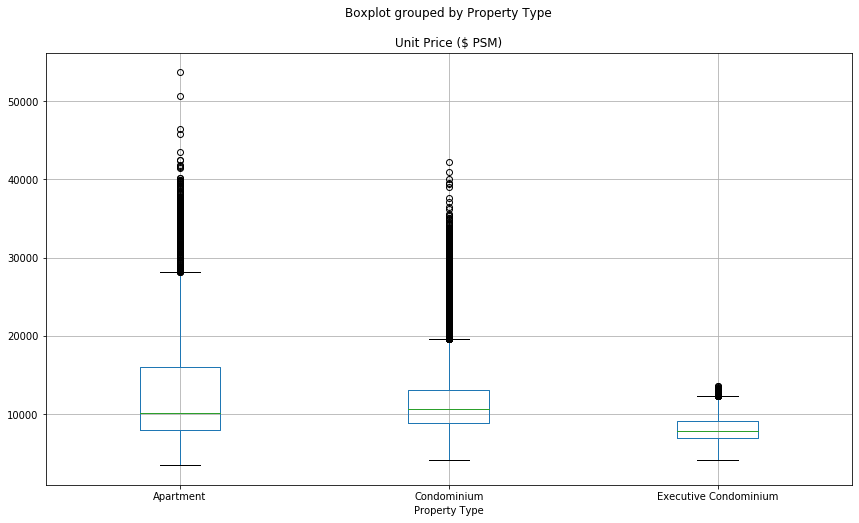

In [31]:
data.boxplot('Unit Price ($ PSM)',by="Property Type", figsize = (14,8))

Executive Condominiums and Apartment are cheaper than Condominiums. However, Apartments seem to have more outliers

In [32]:
df_app = data[data['Property Type'] == 'Apartment']
df_condo = data[data['Property Type'] == 'Condominium']
df_EC = data[data['Property Type'] == 'Executive Condominium']

### Further split on planning area

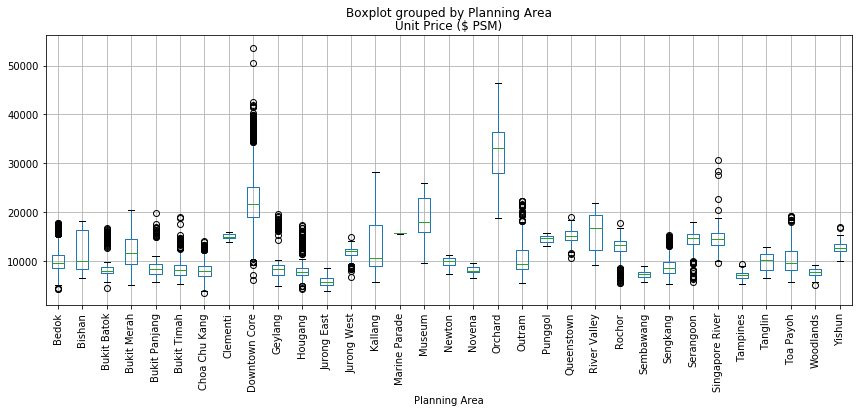

In [33]:
## by planning area (apartment)
df_app.boxplot('Unit Price ($ PSM)',by="Planning Area", rot =90, figsize = (14,5))

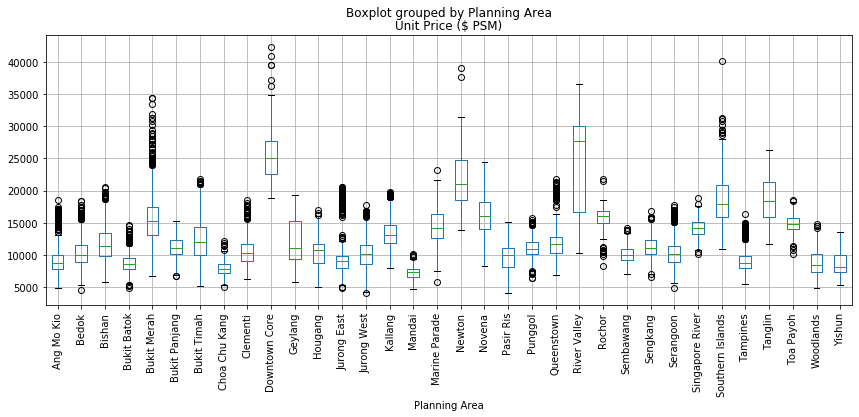

In [34]:
df_condo.boxplot('Unit Price ($ PSM)',by="Planning Area", rot =90, figsize = (14,5))

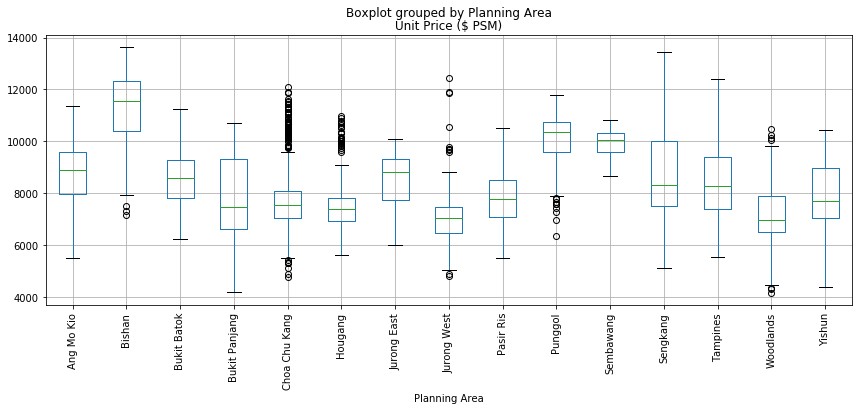

In [35]:
df_EC.boxplot('Unit Price ($ PSM)',by="Planning Area", rot =90, figsize = (14,5))

Not many planning areas have executive condominiums. 

In [37]:
pd.set_option('display.max_rows', 100)
df.groupby(['Planning Area', 'Property Type']).mean()[['Unit Price ($ PSM)',
                                                       'Area (SQM)',
                                                       'Average Cases Per Year',
                                                       'Number of Primary Schools',
                                                       'Nearest Primary School', 
                                                       'num_stations_1km',
                                                       'nearest_station_distance', 
                                                       'Remaining Lease']]

Unit Price ($ PSM)  Area (SQM)  \
Planning Area    Property Type                                           
Ang Mo Kio       Condominium                   9355.182470  116.240637   
                 Executive Condominium         8739.545918  131.943878   
Bedok            Apartment                    10105.021583  129.983556   
                 Condominium                  10336.214567  116.409646   
Bishan           Apartment                    11941.476190  116.857143   
                 Condominium                  11850.028728  118.581395   
                 Executive Condominium        11248.318182  125.238636   
Bukit Batok      Apartment                     9006.377261   92.361757   
                 Condominium                   8716.330293  107.988274   
                 Executive Condominium         8550.131313  126.545455   
Bukit Merah      Apartment                    11950.738462  102.671795   
                 Condominium                  15620.994363  132.004310   
Bukit Panjang    Apartment                     8682.968927  103.610169   
                 Condominium                  11167.616236  109.027675   
                 Executive Condominium         7811.766892  118.868243   
Bukit Timah      Apartment                     8798.226852  147.629630   
                 Condominium                  12404.223793  148.924028   
Choa Chu Kang    Apartment                     8192.821970  112.160985   
                 Condominium                   7953.724265  114.068015   
                 Executive Condominium         7717.168878  126.180941   
Clementi         Apartment                    15015.428571   94.142857   
                 Condominium                  10477.603495  114.524866   
Downtown Core    Apartment                    22588.951482   88.084097   
                 Condominium                  26022.966102  141.203390   
Geylang          Apartment                     9175.076687  112.702454   
                 Condominium                  12081.619976  107.559074   
Hougang          Apartment                     8213.565957  101.268085   
                 Condominium                  10418.418687  114.377778   
                 Executive Condominium         7553.465278  124.552083   
Jurong East      Apartment                     5801.202128  154.297872   
                 Condominium                   9375.882724  118.249685   
                 Executive Condominium         8564.106667  114.173333   
Jurong West      Apartment                    11684.634615  115.192308   
                 Condominium                  10117.900304  112.687215   
                 Executive Condominium         7002.966102  124.767797   
Kallang          Apartment                    13015.765727   96.403471   
                 Condominium                  13329.733794  128.642610   
Mandai           Condominium                   7158.952153  123.110048   
Marine Parade    Apartment                    15712.000000   68.000000   
                 Condominium                  14238.736842  124.392713   
Museum           Apartment                    18825.050000  112.050000   
Newton           Apartment                     9826.535714  236.678571   
                 Condominium                  21515.828571  191.092857   
Novena           Apartment                     8181.375000  123.375000   
                 Condominium                  16094.707090  122.873134   
Orchard          Apartment                    32260.517241  182.448276   
Outram           Apartment                    10909.694981  107.081081   
Pasir Ris        Condominium                   9616.679593  107.526903   
                 Executive Condominium         7854.274809  112.610687   
Punggol          Apartment                    14457.450000   73.950000   
                 Condominium                  11049.102908  103.170022   
                 Executive Condominium        10124.214592  103.182403   
Queenstown       Apartment                  

Apartment are generally cheaper than Condominiums except for few planning areas like Clementi, Jurong West and Serangoon

## Remaining Lease by Planning Area

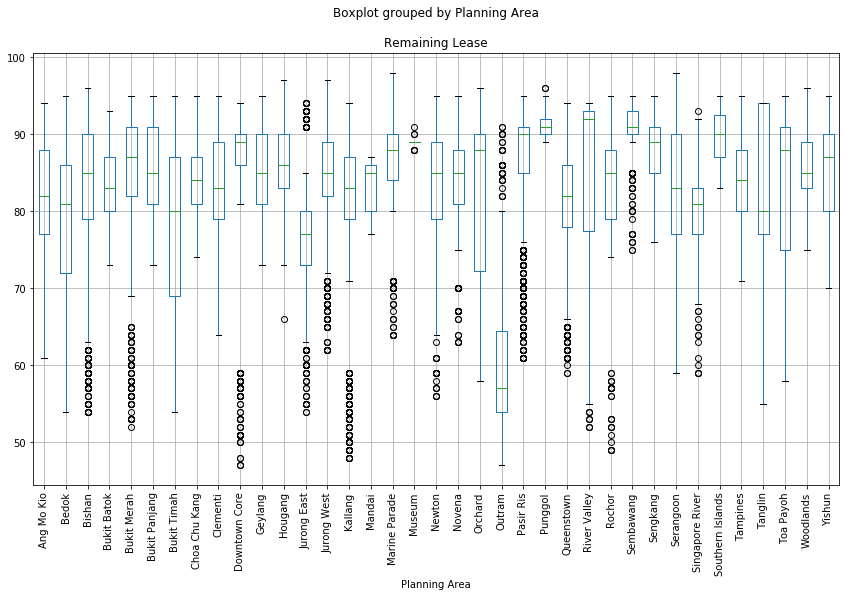

In [38]:
data.boxplot('Remaining Lease',by="Planning Area", rot =90, figsize = (14,8))

[Text(0, 0, 'Ang Mo Kio'),
 Text(0, 0, 'Bedok'),
 Text(0, 0, 'Bishan'),
 Text(0, 0, 'Bukit Batok'),
 Text(0, 0, 'Bukit Merah'),
 Text(0, 0, 'Bukit Panjang'),
 Text(0, 0, 'Bukit Timah'),
 Text(0, 0, 'Choa Chu Kang'),
 Text(0, 0, 'Clementi'),
 Text(0, 0, 'Downtown Core'),
 Text(0, 0, 'Geylang'),
 Text(0, 0, 'Hougang'),
 Text(0, 0, 'Jurong East'),
 Text(0, 0, 'Jurong West'),
 Text(0, 0, 'Kallang'),
 Text(0, 0, 'Mandai'),
 Text(0, 0, 'Marine Parade'),
 Text(0, 0, 'Museum'),
 Text(0, 0, 'Newton'),
 Text(0, 0, 'Novena'),
 Text(0, 0, 'Orchard'),
 Text(0, 0, 'Outram'),
 Text(0, 0, 'Pasir Ris'),
 Text(0, 0, 'Punggol'),
 Text(0, 0, 'Queenstown'),
 Text(0, 0, 'River Valley'),
 Text(0, 0, 'Rochor'),
 Text(0, 0, 'Sembawang'),
 Text(0, 0, 'Sengkang'),
 Text(0, 0, 'Serangoon'),
 Text(0, 0, 'Singapore River'),
 Text(0, 0, 'Southern Islands'),
 Text(0, 0, 'Tampines'),
 Text(0, 0, 'Tanglin'),
 Text(0, 0, 'Toa Payoh'),
 Text(0, 0, 'Woodlands'),
 Text(0, 0, 'Yishun')]

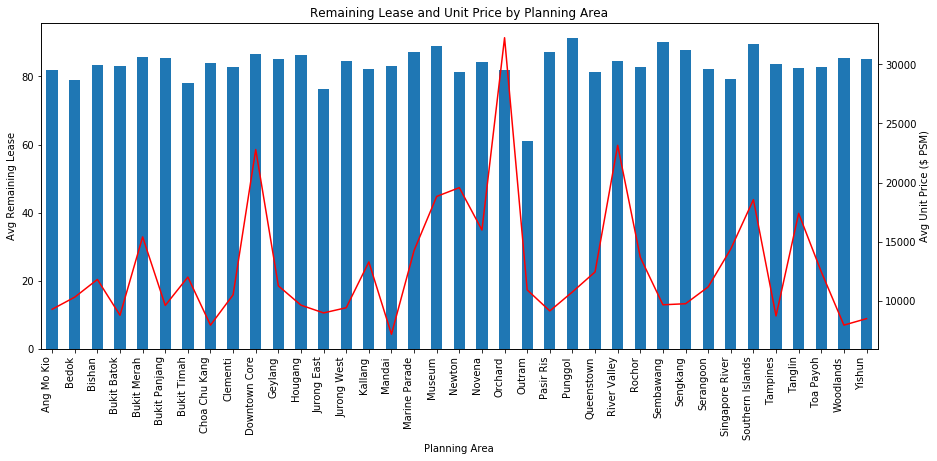

In [39]:
grp = data.groupby('Planning Area').mean()[['Remaining Lease','Unit Price ($ PSM)']]
ax = grp['Remaining Lease'].plot(kind ='bar', figsize = (15,6), rot= 0)
ax2 = grp['Unit Price ($ PSM)'].plot(secondary_y=True, color ='r',ax=ax)
ax.set_xlabel('Planning Area')
ax.set_ylabel('Avg Remaining Lease')
ax2.set_ylabel('Avg Unit Price ($ PSM)')
ax.set_title('Remaining Lease and Unit Price by Planning Area')
ax.set_xticklabels(grp.index,rotation=90, ha='right')

Outram has lowest average remaining lease and a low Unit Price per PSM too. Although, Mandai has the lowest Unit Price per PSM, its average remaining lease is relatively high. Hence, other factor may have greater influence on Unit Price per PSM than remaining lease